# Introduction to machine learning: classification of basalt source

## Import scientific python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
pd.set_option('display.max_columns', None)

# Classifying volcanic rocks

<img src="./images/volcanic-tectonics.png" width = 600 align = 'center'>

Today we are going to deal with igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin as we explored a week ago. During class today, we will focus on data from mafic lava flows (these are called basalts and are the relatively low silica, high iron end of what we looked at last week).

> Igneous rocks form in a wide variety of tectonic settings,
including mid-ocean ridges, ocean islands, and volcanic
arcs. It is a problem of great interest to igneous petrologists
to recover the original tectonic setting of mafic rocks of the
past. When the geological setting alone cannot unambiguously
resolve this question, the chemical composition of
these rocks might contain the answer. The major, minor,
and trace elemental composition of basalts shows large
variations, for example as a function of formation depth
(e.g., Kushiro and Kuno, 1963) --- *Vermeesch (2006)*

For this analysis, we are going to use a dataset that was compiled in 

Vermeesch (2006) Tectonic discrimination of basalts with classification trees, *Geochimica et Cosmochimica Acta*  https://doi.org/10.1016/j.gca.2005.12.016

These data were grouped into 3 categories:

- 256 ***Island arc basalts (IAB)*** from the Aeolian, Izu-Bonin, Kermadec, Kurile, Lesser Antilles, Mariana, Scotia, and Tonga arcs.
- 241 ***Mid-ocean ridge (MORB)*** samples from the East Pacific Rise, Mid Atlantic Ridge, Indian Ocean, and Juan de Fuca Ridge.
- 259 ***Ocean-island (OIB)*** samples from St. Helena, the Canary, Cape Verde, Caroline, Crozet, Hawaii-Emperor, Juan Fernandez, Marquesas, Mascarene, Samoan, and Society islands.

**Let's look at the illustration above and determine where each of these settings are within a plate tectonic context**

## Import data


The data are from the supplemental materials of the Vermeesch (2006) paper. The samples are grouped by affinity MORB, OIB, and IAB.

In [2]:
basalt_data = pd.read_csv('./data/Vermeesch2006.csv')
basalt_data.tail()

,affinity,SiO2_wt_percent,TiO2_wt_percent,Al2O3_wt_percent,Fe2O3_wt_percent,FeO_wt_percent,CaO_wt_percent,MgO_wt_percent,MnO_wt_percent,K2O_wt_percent,Na2O_wt_percent,P2O5(wt%),La_ppm,Ce_ppm,Pr_ppm,Nd_ppm,Sm_ppm,Eu_ppm,Gd_ppm,Tb_ppm,Dy_ppm,Ho_ppm,Er_ppm,Tm_ppm,Yb_ppm,Lu_ppm,Sc_ppm,V_ppm,Cr_ppm,Co_ppm,Ni_ppm,Cu_ppm,Zn_ppm,Ga_ppm,Rb_ppm,Sr_ppm,Y_ppm,Zr_ppm,Nb_ppm,Sn_ppm,Cs_ppm,Ba_ppm,Hf_ppm,Ta_ppm,Pb_ppm,Th_ppm,U_ppm,143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
751,IAB,50.97,0.78,18.86,NaN,NaN,10.85,4.71,0.16,0.60,2.38,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,34.0,152.0,NaN,NaN,7.5,371.0,19.3,56.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,15.556,38.389
752,IAB,51.00,1.41,17.06,3.80,7.04,9.97,4.96,0.17,0.73,2.56,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70348,NaN,NaN,NaN
753,IAB,52.56,1.21,17.74,2.28,7.53,10.48,5.57,0.24,0.29,2.27,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70362,NaN,NaN,NaN
754,IAB,52.59,1.50,16.88,2.41,7.90,10.83,4.91,0.26,0.54,1.63,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70363,NaN,NaN,NaN
755,IAB,52.96,1.27,15.65,2.91,9.32,9.78,4.24,0.23,0.46,2.54,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70352,NaN,NaN,NaN


In [3]:
print(basalt_data.columns)

Index(['affinity', 'SiO2_wt_percent', 'TiO2_wt_percent', 'Al2O3_wt_percent',
       'Fe2O3_wt_percent', 'FeO_wt_percent', 'CaO_wt_percent',
       'MgO_wt_percent', 'MnO_wt_percent', 'K2O_wt_percent', 'Na2O_wt_percent',
       'P2O5(wt%)', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm',
       'Gd_ppm', 'Tb_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm', 'Yb_ppm',
       'Lu_ppm', 'Sc_ppm', 'V_ppm', 'Cr_ppm', 'Co_ppm', 'Ni_ppm', 'Cu_ppm',
       'Zn_ppm', 'Ga_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Sn_ppm', 'Cs_ppm', 'Ba_ppm', 'Hf_ppm', 'Ta_ppm', 'Pb_ppm', 'Th_ppm',
       'U_ppm', '143Nd/144Nd', '87Sr/86Sr', '206Pb/204Pb', '207Pb/204Pb',
       '208Pb/204Pb'],
      dtype='object')


## Can geochemical data be used to classify the tectonic setting?

These data are labeled. The author already determined what setting these basalts came from. However, is there are way that we could use these labeled data to determine the setting for an unknown basalt?

A paper published in 1982 proposed that the elements titanium and vanadium were particular good at giving insight into tectonic setting. The details of why are quite complicated and can be summarized as "the depletion of V relative to Ti is a function of the fO2 of the magma and its source, the degree of partial melting, and subsequent fractional crystallization." If you take EPS100B you will learn more about the fundamentals behind this igneous petrology. *For the moment, you can consider the working hypothesis behind this classification to that different magmatic environments have differences in oxidation states that are reflected in Ti vs V ratios.*

Shervais, J.W. (1982) Ti-V plots and the petrogenesis of modern and ophiolitic lavas *Earth and Planetary Science Letters* https://doi.org/10.1016/0012-821X(82)90120-0

### Plot TiO2 (wt%) vs V (ppm)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


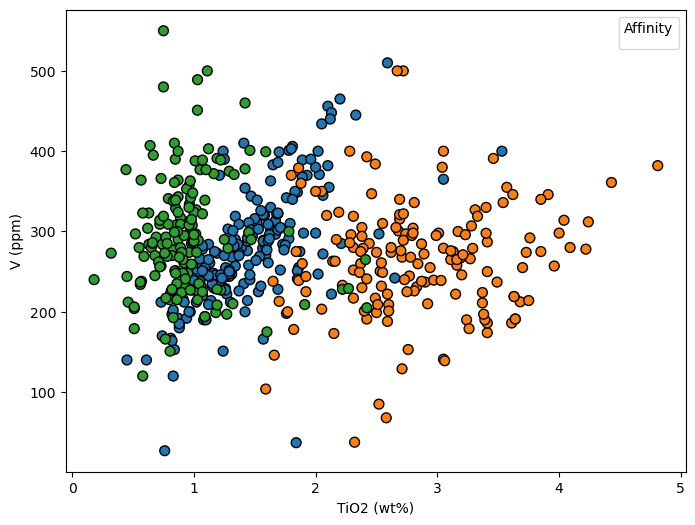

In [4]:
plt.figure(figsize=(8, 6))
color = pd.Categorical(basalt_data['affinity']).codes
cmap = ListedColormap(['C2', 'C0', 'C1'])
plt.scatter(basalt_data['TiO2_wt_percent'], basalt_data['V_ppm'], c=color, cmap=cmap, edgecolor='k', s=50)
plt.legend(title="Affinity")
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()

### Training and testing

### Import more `sklearn` tools

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer


## Review: Linear logistic regression

- Using only $TiO_2$ and V, we can use logistic regression to classify the data into MORB, OIB, and IAB.

In [6]:
# Prepare the data
basalt_data_Ti_V = basalt_data[(~basalt_data['TiO2_wt_percent'].isna()) & (~basalt_data['V_ppm'].isna())]
X = basalt_data_Ti_V[['TiO2_wt_percent', 'V_ppm']].values
y = basalt_data_Ti_V['affinity'].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.85


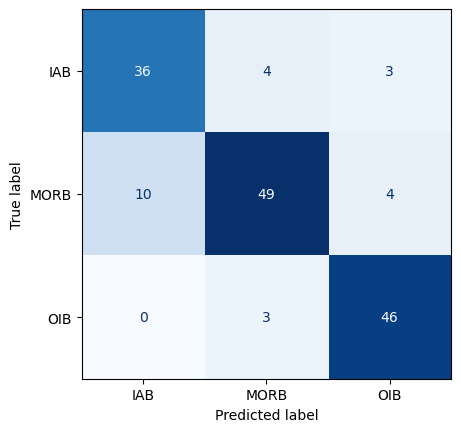

In [7]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False)
plt.show()

## More classification methods

- Support vector machines
- Decision trees (Random forests)
- Nearest neighbors
- Neural networks


While there is a nice simplicity to the linear classifier approach comparing the $TiO_2$ vs V data, we have a lot more information from other aspects of the geochemistry. We might as well use that information as well.

Let's use all the data we can.

In [8]:
basalt_data.head(1)

,affinity,SiO2_wt_percent,TiO2_wt_percent,Al2O3_wt_percent,Fe2O3_wt_percent,FeO_wt_percent,CaO_wt_percent,MgO_wt_percent,MnO_wt_percent,K2O_wt_percent,Na2O_wt_percent,P2O5(wt%),La_ppm,Ce_ppm,Pr_ppm,Nd_ppm,Sm_ppm,Eu_ppm,Gd_ppm,Tb_ppm,Dy_ppm,Ho_ppm,Er_ppm,Tm_ppm,Yb_ppm,Lu_ppm,Sc_ppm,V_ppm,Cr_ppm,Co_ppm,Ni_ppm,Cu_ppm,Zn_ppm,Ga_ppm,Rb_ppm,Sr_ppm,Y_ppm,Zr_ppm,Nb_ppm,Sn_ppm,Cs_ppm,Ba_ppm,Hf_ppm,Ta_ppm,Pb_ppm,Th_ppm,U_ppm,143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
0,MORB,48.2,2.52,15.2,2.31,8.56,9.69,7.15,0.17,0.9,3.79,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.8,297.0,196.0,43.0,113.0,44.0,97.0,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.2,NaN,2.15,1.4881,0.4941,NaN,0.703,NaN,NaN,NaN


### Preparing the data to use features other than TiO2 and V

1. Encode the target variable 'affinity' using LabelEncoder: The target variable 'affinity' contains categorical data, which needs to be encoded as numerical values for the decision tree classifier. The LabelEncoder from scikit-learn is used to transform the 'affinity' column into numerical labels.

2. Split the data into features (X) and target (y): The dataset is split into two parts, features (X) and the target variable (y). Features are the input variables that the classifier will use to make predictions, and the target variable is the output we want the classifier to predict.

3. Impute missing values using median imputation: most classifiers cannot handle missing values in the input data. Therefore, missing values in the dataset need to be imputed (filled in) before training the classifier. Let's use median imputation which replaces the missing values with the median of the non-missing values in the same column. We can import and use the `SimpleImputer` function.

In [9]:
# Encode the target variable
le = LabelEncoder()
basalt_data['affinity'] = le.fit_transform(basalt_data['affinity'])

# Split the data into features (X) and target (y)
X = basalt_data.drop('affinity', axis=1)
y = basalt_data['affinity']

# Impute missing values using median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

## Support Vector Machines (SVM)

## What is a support vector machine?

Support vector machines are a type of supervised learning model that can be used for both classification and regression. The basic idea is to find the hyperplane that best separates the classes in the feature space. The hyperplane is defined by the support vectors, which are the points that are closest to the hyperplane. The distance between the support vectors and the hyperplane is called the margin. The goal of the SVM is to maximize the margin, which is done by minimizing the norm of the weight vector. The SVM can be used for both linear and non-linear classification by using different kernel functions.

## How does the SVM work?

Support vector machines work by finding the hyperplane that best separates the classes in the feature space. The hyperplane is defined by the support vectors, which are the points that are closest to the hyperplane. The distance between the support vectors and the hyperplane is called the margin. The goal of the SVM is to maximize the margin, which is done by minimizing the norm of the weight vector. The SVM can be used for both linear and non-linear classification by using different kernel functions.

![](images/SVM-basic.png)

## What is a kernel function?

A kernel function is a function that takes two input vectors and returns a scalar value. The kernel function is used to map the input vectors into a higher-dimensional space where the classes are linearly separable. The most common kernel functions are the linear kernel, the polynomial kernel, and the radial basis function (RBF) kernel.

![](images/SVM-kernel.png)




## Let's try a support vector machine classifier for our data

First, we will use a linear kernel to classify the data. Same as before, we will use the `SVC` class from the `sklearn.svm` module. We will use the `fit` method to train the model on the training data and the `predict` method to make predictions on the test data.

Accuracy: 0.91


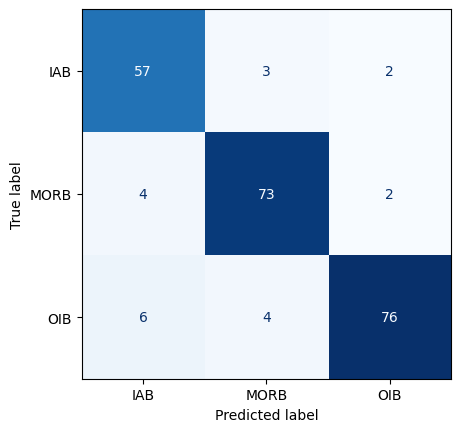

In [10]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = make_pipeline(StandardScaler(), SVC(kernel="linear"))
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False)
plt.show()

Let's try to classify the data using a non-linear kernel. We will use the radial basis function (RBF) kernel, which is the default kernel for the `SVC` class. The RBF kernel is defined as:

$$K(x, x') = \exp(-\gamma ||x - x'||^2)$$

where $\gamma$ is a hyperparameter that controls the smoothness of the decision boundary. A larger value of $\gamma$ will result in a more complex decision boundary, which can lead to overfitting. We will use the default value of $\gamma$ for now, but we can tune it later if needed.

Accuracy: 0.94


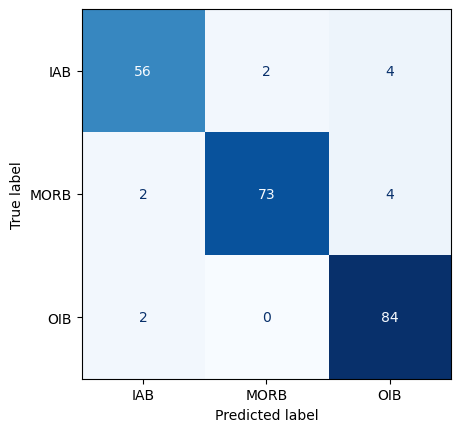

In [11]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

gamma = 0.03
classifier = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=gamma))
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False)
plt.show()

## Decision tree

Let's try a **Decision Trees** approach which is another supervised machine learning algorithm for classification 

**Decision Trees** are a type of flowchart-like structure where internal nodes represent decisions based on the input features, branches represent the outcome of these decisions, and leaf nodes represent the final output or class label. The primary goal of a decision tree is to recursively split the data into subsets based on feature values that maximize the separation between the classes.

*Why use Decision Trees?*

- Easy to understand and interpret: Decision Trees are human-readable and can be visualized, making them easy to understand and interpret even for those with limited machine learning experience.
- Minimal data preprocessing: Decision Trees do not require extensive data preprocessing, such as scaling or normalization, as they can handle both numerical and categorical features.
- Non-linear relationships: Decision Trees can model complex, non-linear relationships between features and target variables.
- Feature importance: Decision Trees can provide insights into feature importance, helping to identify the most relevant features for the problem at hand.

### Implement the `DecisionTreeClassifier`

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9030837004405287


### Plot the decision tree

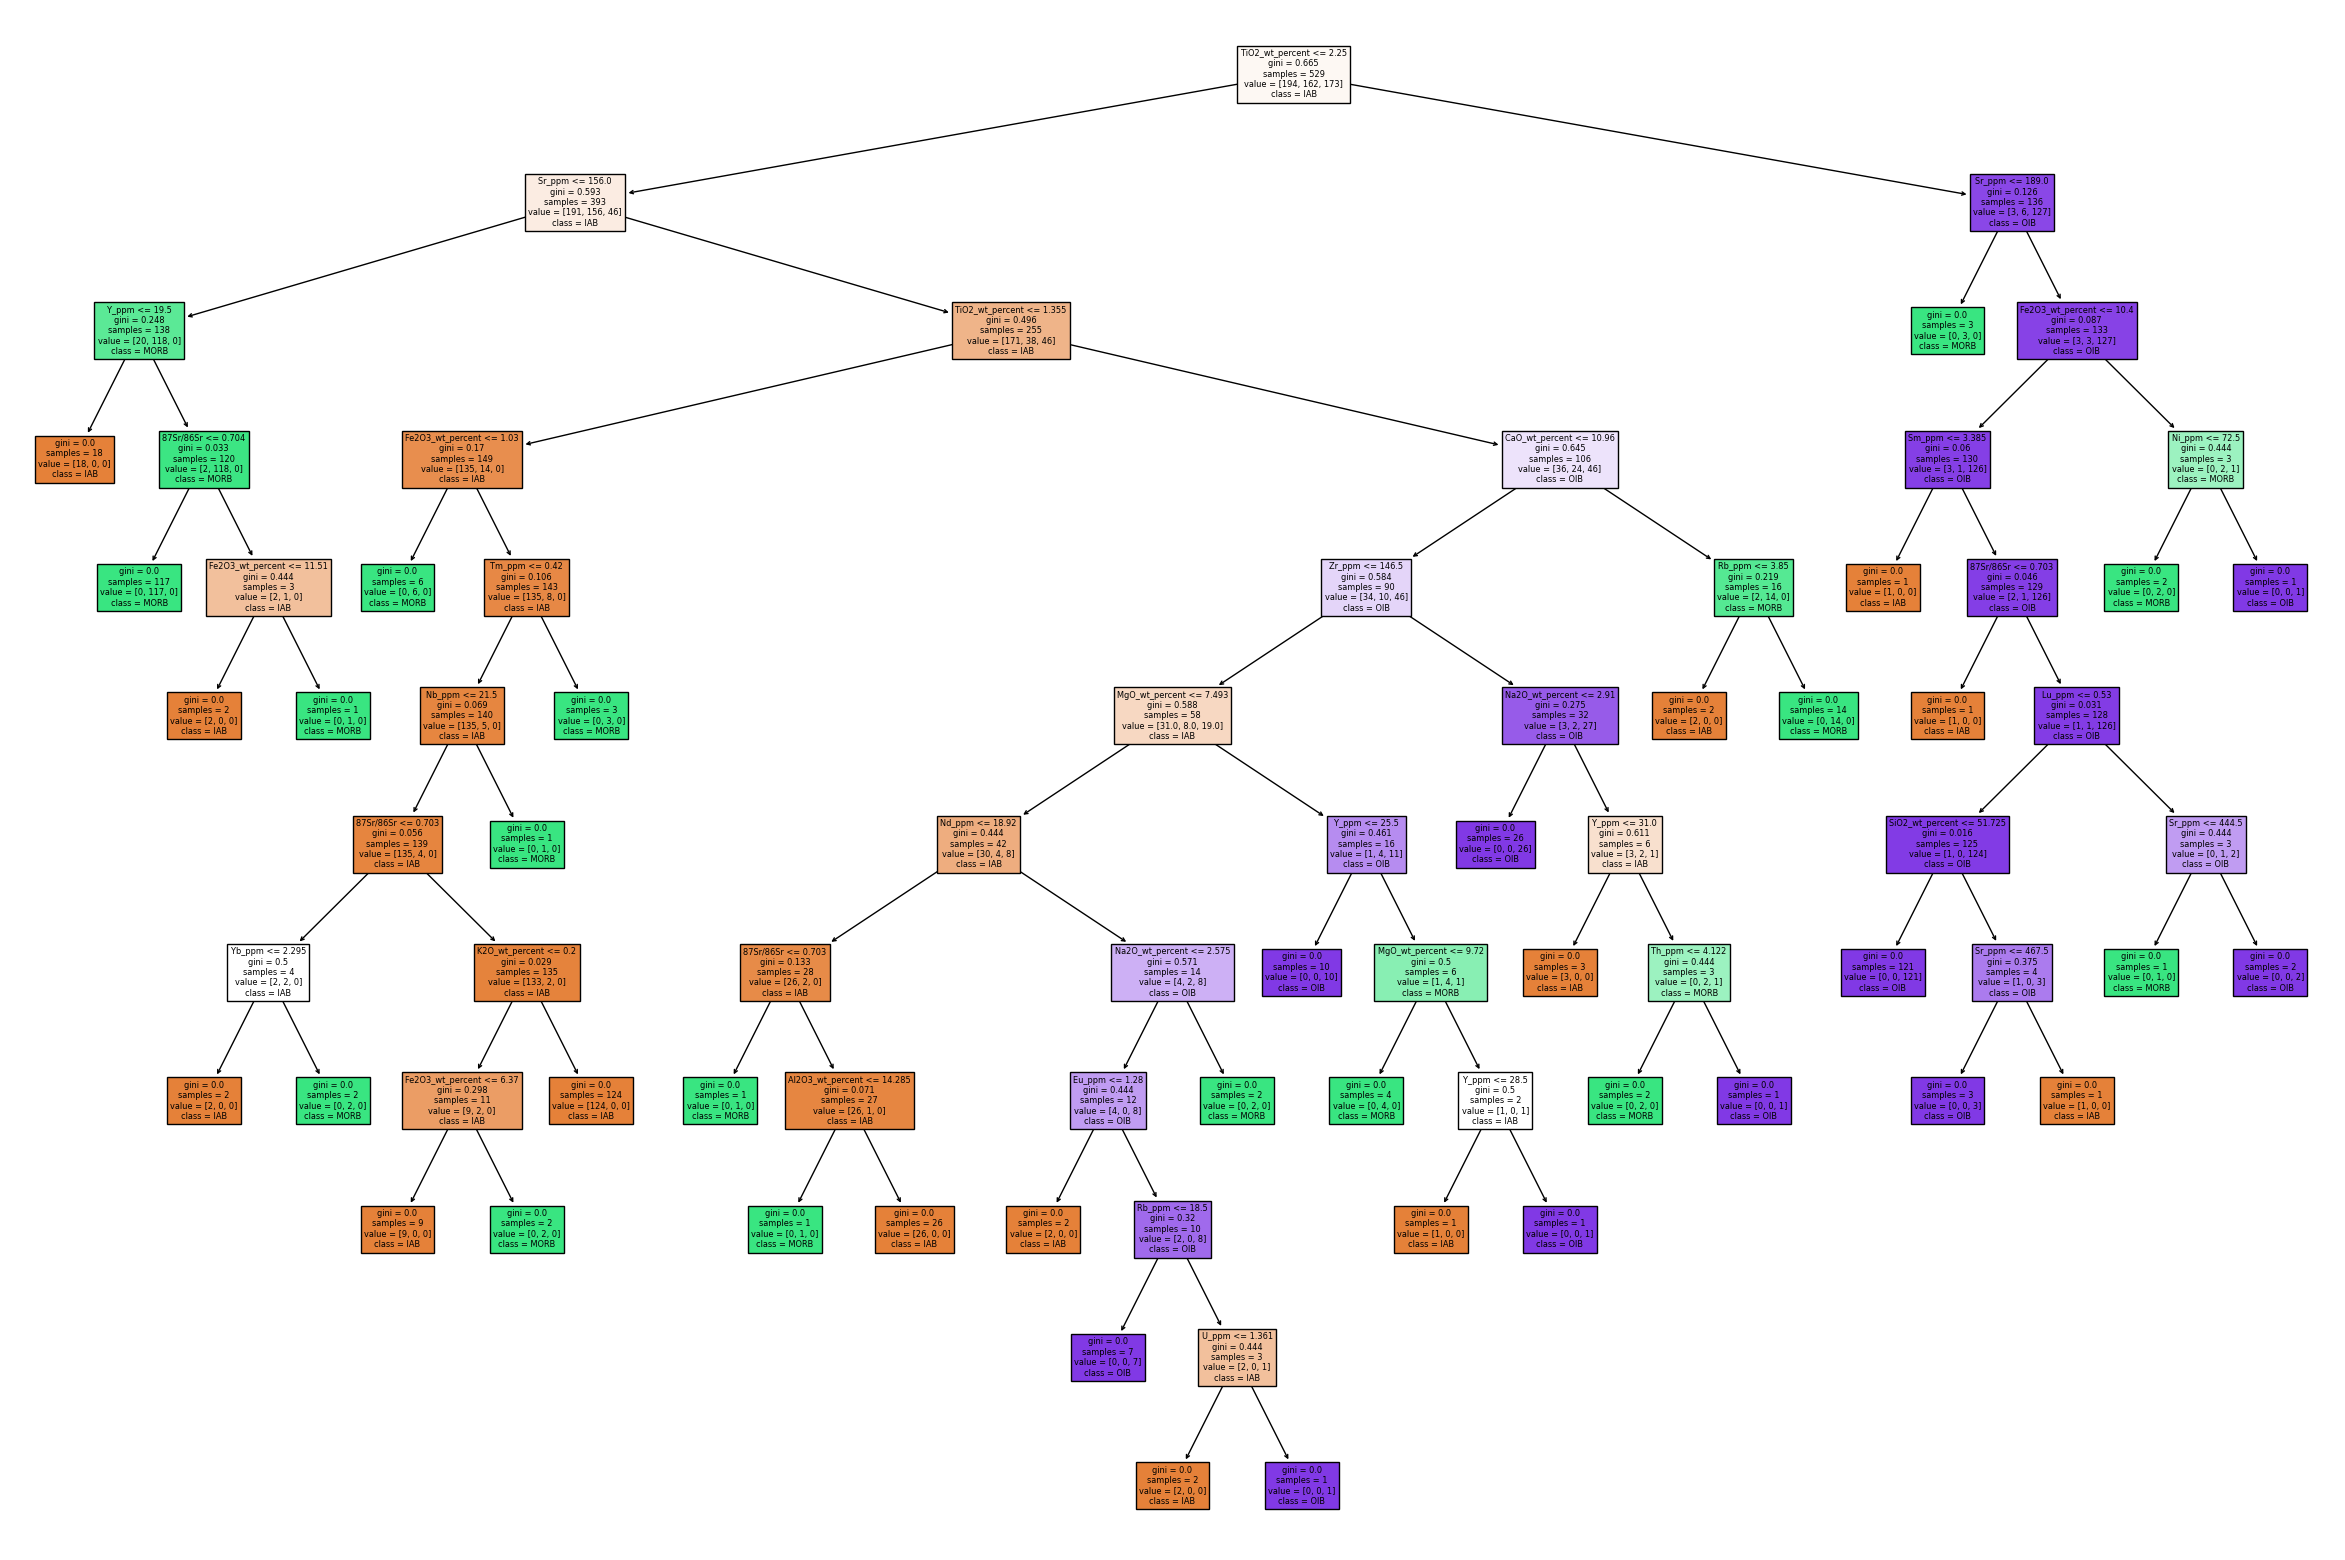

In [13]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 20))

# Get the original class names
class_names = le.inverse_transform(np.unique(y)).astype(str)

# Visualize the decision tree
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=class_names, ax=ax)

plt.show()

### What aspects of the data are important for the classification?

We want to be able to readily determine what data fields are the most important for the decision tree. We can do that by determining "feature importance." The code below extracts and displays the importance score, also known as Gini importance or Mean Decrease Impurity, which is a measure of how much a feature contributes to the decision-making process of the decision tree model. 

In [14]:
# Get the feature importances from the classifier
importances = classifier.feature_importances_

# Pair the feature names with their corresponding importances
feature_importances = list(zip(X.columns, importances))

# Create a DataFrame from the feature importances
df_feature_importances = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

# Sort the feature importances in descending order
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

# Reset the index and drop the old index column
df_feature_importances.reset_index(drop=True, inplace=True)

# Display the sorted feature importances
display(df_feature_importances)


,Feature,Importance
0,TiO2_wt_percent,0.382039
1,Sr_ppm,0.229212
2,Y_ppm,0.107994
3,Fe2O3_wt_percent,0.049282
4,CaO_wt_percent,0.035101
5,MgO_wt_percent,0.028612
6,Zr_ppm,0.027348
7,87Sr/86Sr,0.023192
8,Na2O_wt_percent,0.022216
9,Nd_ppm,0.019770


**Question**

*If we were going to build a classifier on just two variables, which should be pick?*

## Exploring other classification algorithms

If you go to the scikit-learn homepage you will find many available classifiers: https://scikit-learn.org/stable/index.html. They are nicely illustrated in this code from the scikit-learn documentation.

/Users/weiqiang/.local/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/weiqiang/.local/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/weiqiang/.local/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


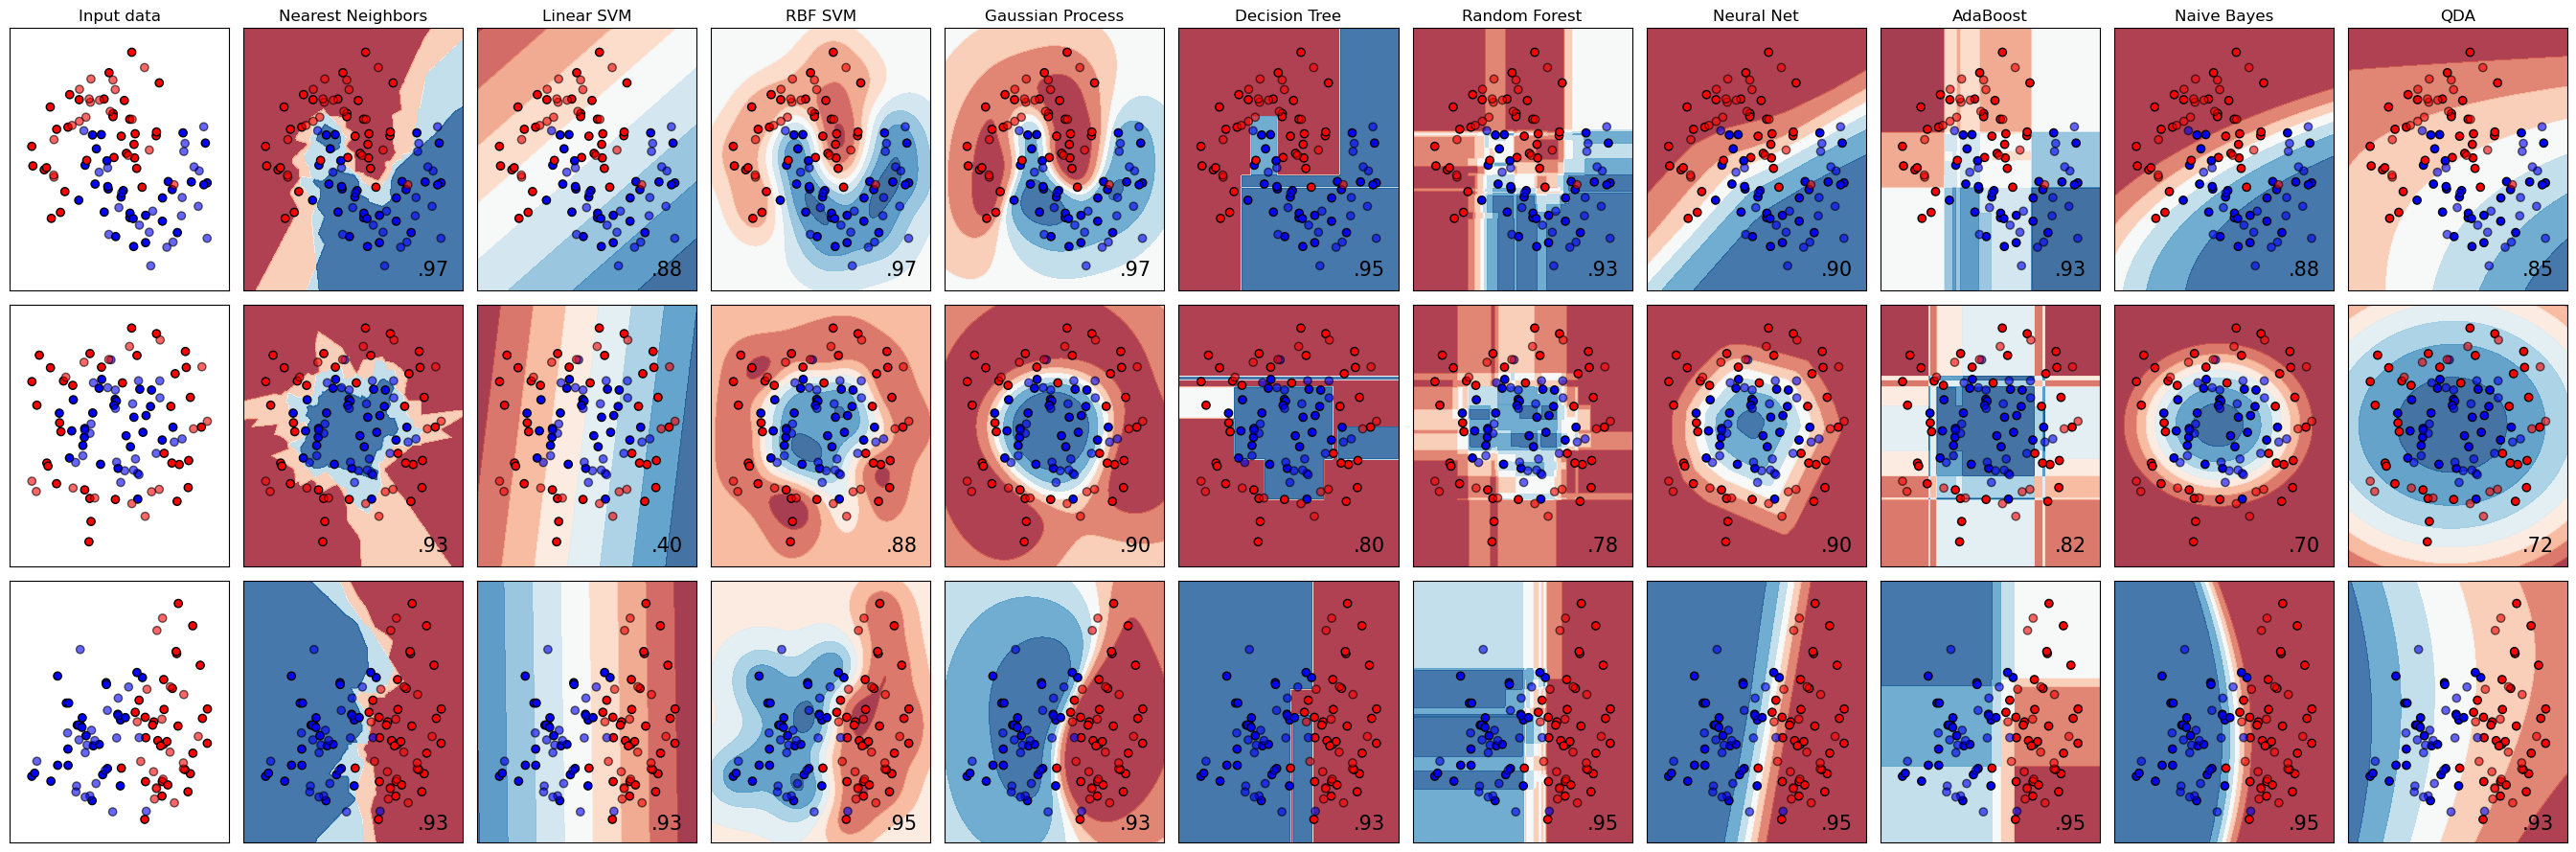

In [15]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Normalize the data

The decision tree suggested that Ti and Sr were the biggest differentiators. Let's have a look at Ti (wt %) vs Sr (ppm) and apply different classifying algorithms. For many of these algorithms, it is essential to normalize the data. For example, the nearest neighbor is a distance. Consider that in the TiO2 (wt%) vs. Sr (ppm) or V (ppm) the y-axis and x-axis are so different (in part because of different units). So we need to normalize the data.

We can use the `sklearn.preprocessing` function `StandardScaler` to help us here.

Let's make a `basalt_data_Ti_Sr` dataframe and then apply the `StandardScaler` approach.

In [16]:
basalt_data_Ti_Sr = basalt_data[(~basalt_data['TiO2_wt_percent'].isna()) & (~basalt_data['Sr_ppm'].isna())]

In [17]:
from sklearn.preprocessing import StandardScaler

# Extract the necessary features and target variable
X = basalt_data_Ti_Sr[['TiO2_wt_percent', 'Sr_ppm']]
y = basalt_data_Ti_Sr['affinity']

# Encode the target variable 'affinity' using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_normalized = scaler.transform(X_test)

### Apply different classifiers

Now that we have normalized the data, we can apply classifiers, I have put in the `KNeighborsClassifier(3)`. **What are the strengths and weaknesses of this classifier?**

*write your answer here*

Play around with switching the classifier to other ones from the example above. **What would the best classifier to use?**

*write your answer here*

Accuracy: 0.900523560209424


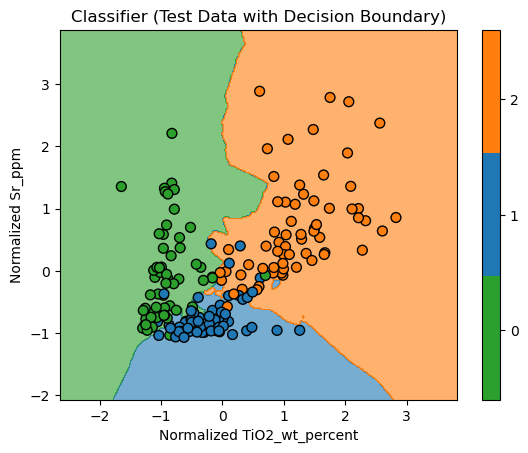

In [18]:
# Play around with changing KNeighborsClassifier(3) to different classifiers
classifier = KNeighborsClassifier(3)
classifier.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_normalized)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a meshgrid 
h = 0.02  # Mesh grid step size
x_min, x_max = X_test_normalized[:, 0].min() - 1, X_test_normalized[:, 0].max() + 1
y_min, y_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Classify the grid points using the classifier
grid = np.c_[xx.ravel(), yy.ravel()]
grid_classes = classifier.predict(grid)

# Reshape the predicted class labels to match the shape of the input grid
grid_classes = grid_classes.reshape(xx.shape)

# Plot the decision boundary and the test data points
cmap = ListedColormap(['C2', 'C0', 'C1'])
plt.figure()
plt.contourf(xx, yy, grid_classes, cmap=cmap, alpha=0.6)
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap=cmap, edgecolors='k', marker='o', s=50)

# Add a legend
cbar = plt.colorbar(ticks=[0.375, 1., 1.625])
cbar.set_ticklabels(le.inverse_transform([0, 1, 2]))

plt.xlabel('Normalized TiO2_wt_percent')
plt.ylabel('Normalized Sr_ppm')
plt.title('Classifier (Test Data with Decision Boundary)')
plt.show()

## A word of warning

As a word of warning, we shouldn't get too carried away. Clearly, there are complexities related to this approach (our accuracy scores aren't that high). There are other types of contextual data that can give insight. For example, Shervais (1982) notes that: 
> "More specific evaluation of the tectonic setting of these and other ophiolites requires
application of detailed geologic and petrologic data as well as geochemistry. The Ti/V discrimination diagram, however,
is a potentially powerful adjunct to these techniques."

Vermeesch adds to this point by writing:
> "no classification method based solely on geochemical
data will ever be able to perfectly determine the
tectonic affinity of basaltic rocks (or other rocks for that
matter) simply because there is a lot of actual overlap between
the geochemistry of the different tectonic settings.
Notably IABs have a much wider range of compositions
than either MORBs or OIBs. Therefore, geochemical classification
should never be the only basis for determining
tectonic affinity. This is especially the case for rocks that
have undergone alteration. In such cases, mobile elements
such as Sr, which have great discriminative power, cannot
be used."

Additionally, we would like to be able to assign physical processes to any classification given that we are seeking insight into how the Earth works.